In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy.ma as ma
import numpy as np
import cmocean

%matplotlib inline

In [4]:
grid=xr.open_dataset('/mnt/meom/workdir/alberta/eNATL60/eNATL60-I/coordinates_eNATL60OSMOc.nc')
navlon=grid['nav_lon']
navlat=grid['nav_lat']


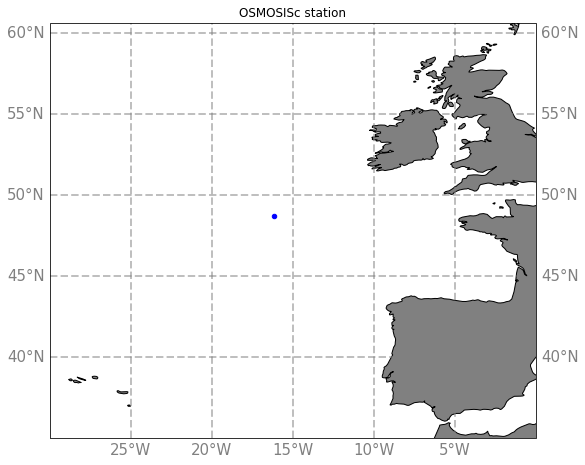

In [8]:
fig = plt.figure(figsize=(22,10))

ax = fig.add_subplot(121,projection=ccrs.PlateCarree(central_longitude=-30))
ax.autoscale(tight=True)
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='grey')
ax.add_feature(land_50m)
#ax.coastlines()
extent = [-30, 0,35,60]
ax.set_extent(extent)

ax.scatter(navlon,navlat,c='b',s=20,transform=ccrs.PlateCarree())
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator(np.arange(-90,90,5))
gl.ylocator = mticker.FixedLocator(np.arange(0,90,5))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
#gl.ylabels_right = False
gl.xlabels_top = False
fig.subplots_adjust(right=0.8)

plt.title('OSMOSISc station')
plt.savefig('station_OSMOSISc.png', bbox_inches='tight')